In [1]:
import pandas as pd
import numpy as np
from datetime import datetime ,timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("A:\Data Set\Online Retail.csv")

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Calculating the Missing Values % contribution in DF
df_null = round(df.isnull().sum()/len(df)*100,2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [7]:
df.loc[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [8]:
df = df.dropna(subset=['CustomerID'])

In [9]:
df.loc[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df = df.drop('Description', axis=1)

In [12]:
df.shape

(406829, 7)

In [13]:
#Remove duplicate data records:
df = df.drop_duplicates()
df.shape

(401602, 7)

In [14]:
#converting customer id as string 
df['CustomerID'] = df['CustomerID'].astype(str)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401602 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401602 non-null  object 
 1   StockCode    401602 non-null  object 
 2   Quantity     401602 non-null  int64  
 3   InvoiceDate  401602 non-null  object 
 4   UnitPrice    401602 non-null  float64
 5   CustomerID   401602 non-null  object 
 6   Country      401602 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.5+ MB


In [16]:
df.describe()

,Quantity,UnitPrice
count,401602.000000,401602.000000
mean,12.182579,3.474064
std,250.283248,69.764209
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [17]:
df.describe(include=['O'])

,InvoiceNo,StockCode,InvoiceDate,CustomerID,Country
count,401602,401602,401602,401602,401602
unique,22190,3684,20460,4372,37
top,576339,85123A,11/14/2011 15:27,17841.0,United Kingdom
freq,542,2065,543,7812,356726


##InvoiceNo: Total entries in preprocessed data are 4,01,602 but transactions are 22,190. Most number of entries (count of unique products) are in Invoice No. '576339' and is 542 nos.

##StockCode: There are total 3684 unique products in our data and product with stock code '85123A' appears most frequently (2065 times) in our data.

##CustomerID: There are 4372 unique customers in our final preprocessed data. Customer with ID '17841' appears most frequently in data (7812 times)

##Country: Company has customers across 37 countries. Most entries are from United Kingdom in our dataset (356726)

In [18]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [19]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401602 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401602 non-null  object        
 1   StockCode    401602 non-null  object        
 2   Quantity     401602 non-null  int64         
 3   InvoiceDate  401602 non-null  datetime64[ns]
 4   UnitPrice    401602 non-null  float64       
 5   CustomerID   401602 non-null  object        
 6   Country      401602 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 24.5+ MB


In [21]:
df['Month_Frame'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [22]:
df['Month_Frame'].nunique()

13

In [23]:
Month_wise_transactions = df.groupby('Month_Frame')['CustomerID'].nunique()

In [24]:
Month_wise_transactions

Month_Frame
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'No. of active customers in each month')

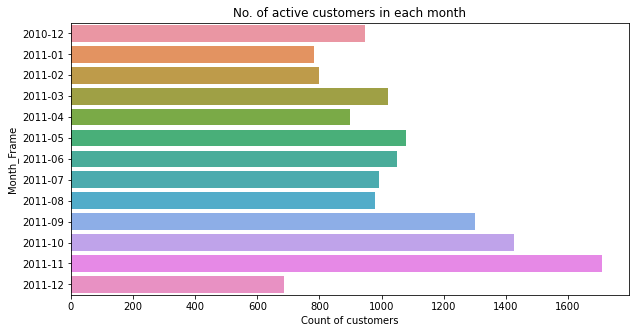

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(y = Month_wise_transactions.index, x = Month_wise_transactions.values);
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")

In [26]:
#retension 
Month_wise_transactions - Month_wise_transactions.shift(1)

Month_Frame
2010-12       NaN
2011-01    -165.0
2011-02      15.0
2011-03     222.0
2011-04    -121.0
2011-05     180.0
2011-06     -28.0
2011-07     -58.0
2011-08     -13.0
2011-09     322.0
2011-10     123.0
2011-11     286.0
2011-12   -1025.0
Name: CustomerID, dtype: float64

In [27]:
#retension rate
retension_rate = round(Month_wise_transactions.pct_change(periods=1)*100,2)
retension_rate

Month_Frame
2010-12      NaN
2011-01   -17.41
2011-02     1.92
2011-03    27.82
2011-04   -11.86
2011-05    20.02
2011-06    -2.59
2011-07    -5.52
2011-08    -1.31
2011-09    32.86
2011-10     9.45
2011-11    20.07
2011-12   -59.91
Name: CustomerID, dtype: float64

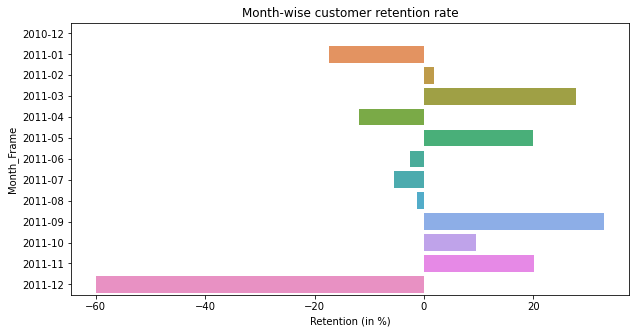

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(y=retension_rate.index,x=retension_rate.values)
plt.xlabel("Retention (in %)")
plt.title("Month-wise customer retention rate");

In [29]:
#Monetary analysis:
df['Amount'] = df['Quantity']*df['UnitPrice']

In [30]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Frame,Amount
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,20.34


In [31]:
df_monitory = df.groupby('CustomerID').sum()['Amount'].reset_index()

In [32]:
df_monitory

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


In [33]:
#Frequency Analysis:
df_frequency = df.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
df_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [34]:
#Recency

In [35]:
ref_day = max(df['InvoiceDate'])+ timedelta(days=1)

In [36]:
ref_day

Timestamp('2011-12-10 12:50:00')

In [37]:
df['days_to_last_order'] = (ref_day - df['InvoiceDate']).dt.days

In [38]:
df.tail()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Frame,Amount,days_to_last_order
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12,10.20,1
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12,12.60,1
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60,1
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12,16.60,1
541908,581587,22138,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12,14.85,1


In [39]:
df_recency = df.groupby('CustomerID')['days_to_last_order'].min().reset_index()

In [40]:
df_recency

,CustomerID,days_to_last_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4367,18280.0,278
4368,18281.0,181
4369,18282.0,8
4370,18283.0,4


In [41]:
#Calculate RFM metrics:
df_rf = pd.merge(df_recency,df_frequency, on='CustomerID',how = 'inner')

In [42]:
df_rfm = pd.merge(df_rf,df_monitory, on='CustomerID',how='inner')

In [43]:
df_rfm

,CustomerID,days_to_last_order,InvoiceNo,Amount
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2045.53


In [44]:
df_rfm.columns = ['CustomerID','Recency','Frequency','Monetary']

In [45]:
df_rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
...,...,...,...,...
4367,18280.0,278,1,180.60
4368,18281.0,181,1,80.82
4369,18282.0,8,3,176.60
4370,18283.0,4,16,2045.53


In [46]:
#Build RFM Segments:
df_rfm['recency_lables'] = pd.cut(df_rfm['Recency'],bins = 5, labels=['newest','newer','medium','older','oldest'])

newest    2734
newer      588
medium     416
older      353
oldest     281
Name: recency_lables, dtype: int64

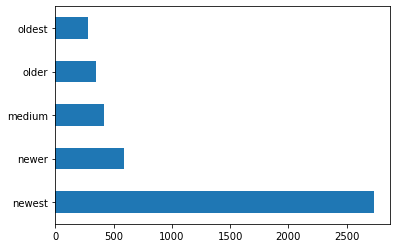

In [47]:
df_rfm['recency_lables'].value_counts().plot(kind='barh');
df_rfm['recency_lables'].value_counts()

very_small    4357
small            9
avg              3
largest          2
large            1
Name: money_lable, dtype: int64

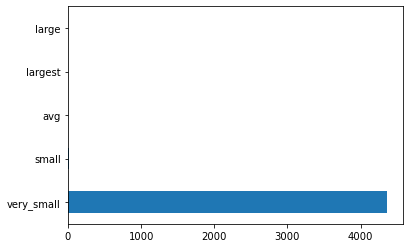

In [48]:
df_rfm['money_lable'] = pd.cut(df_rfm['Monetary'],bins=5,labels=['very_small','small','avg','large','largest'])
df_rfm['money_lable'].value_counts().plot(kind='barh');
df_rfm['money_lable'].value_counts()

lowest     4348
lower        18
medium        3
highest       2
higher        1
Name: frequency_lable, dtype: int64

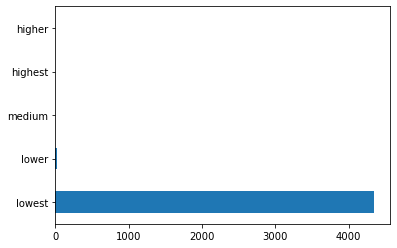

In [49]:
df_rfm['frequency_lable'] = pd.cut(df_rfm['Frequency'],bins=5,labels=['lowest', 'lower', 'medium', 'higher', 'highest'])
df_rfm['frequency_lable'].value_counts().plot(kind='barh');
df_rfm['frequency_lable'].value_counts()

In [50]:
recency_dict = {'newest':5,'newer':4,'medium':3,'older':2,'oldest':1}
frequency_dict = {'lowest':1, 'lower':2, 'medium': 3, 'higher':4, 'highest':5}
monetary_dict = {'very_small':1,'small':2,'avg':3,'large':4,'largest':5}

In [51]:
df_rfm['rfm_score'] = df_rfm['recency_lables'].map(recency_dict).astype(int)+ df_rfm['frequency_lable'].map(frequency_dict).astype(int) + df_rfm['money_lable'].map(monetary_dict).astype(int)
df_rfm.head(10)
df_rfm.shape

(4372, 8)

In [52]:
df_cou = df[['CustomerID','Country']].reset_index()
df_cou= df_cou.drop(labels='index',axis=1)
    

In [53]:
df_cou = df_cou.drop_duplicates()

In [54]:
country_dict = dict(zip(df_cou['CustomerID'],df_cou['Country']))

In [55]:
df_rfm['Country'] = df_rfm['CustomerID'].map(country_dict).astype(str)

In [56]:
df_rfm['Country'].nunique() #using lable encoder 

37

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()

In [59]:
df_rfm['Country'] = le.fit_transform(df_rfm['Country'])
df_rfm

,CustomerID,Recency,Frequency,Monetary,recency_lables,money_lable,frequency_lable,rfm_score,Country
0,12346.0,326,2,0.00,oldest,very_small,lowest,3,35
1,12347.0,2,7,4310.00,newest,very_small,lowest,7,16
2,12348.0,75,4,1797.24,newest,very_small,lowest,7,12
3,12349.0,19,1,1757.55,newest,very_small,lowest,7,18
4,12350.0,310,1,334.40,oldest,very_small,lowest,3,24
...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,older,very_small,lowest,4,35
4368,18281.0,181,1,80.82,medium,very_small,lowest,5,35
4369,18282.0,8,3,176.60,newest,very_small,lowest,7,35
4370,18283.0,4,16,2045.53,newest,very_small,lowest,7,35


In [60]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerID       4372 non-null   object  
 1   Recency          4372 non-null   int64   
 2   Frequency        4372 non-null   int64   
 3   Monetary         4372 non-null   float64 
 4   recency_lables   4372 non-null   category
 5   money_lable      4372 non-null   category
 6   frequency_lable  4372 non-null   category
 7   rfm_score        4372 non-null   int32   
 8   Country          4372 non-null   int32   
dtypes: category(3), float64(1), int32(2), int64(2), object(1)
memory usage: 218.4+ KB


In [61]:
X = df_rfm[['Recency','Frequency','Monetary','Country']]

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc = StandardScaler()
for col in X.columns:
    X[col]=sc.fit_transform(X[col].values.reshape(-1,1))
X.head()

<ipython-input-63-3c00d87bbeee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=sc.fit_transform(X[col].values.reshape(-1,1))
<ipython-input-63-3c00d87bbeee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=sc.fit_transform(X[col].values.reshape(-1,1))
<ipython-input-63-3c00d87bbeee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Recency,Frequency,Monetary,Country
0,2.322023,-0.329362,-0.230417,0.292356
1,-0.893733,0.206102,0.294087,-2.800537
2,-0.169196,-0.115176,-0.011703,-3.451672
3,-0.725005,-0.436455,-0.016533,-2.474969
4,2.163220,-0.436455,-0.189723,-1.498267


In [64]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter= 400,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

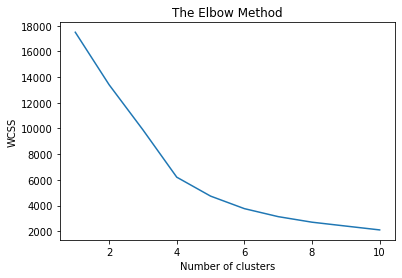

In [65]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
from sklearn.cluster import KMeans

In [67]:
kmeans_model_new = KMeans(n_clusters = 4,init='k-means++',max_iter=400,random_state=42)

In [68]:
Y = kmeans_model_new.fit_predict(X)
Y

array([0, 1, 1, ..., 3, 3, 3])

In [69]:
# Looking at the points which belong to Cluster 3
df_rfm[Y==2]

,CustomerID,Recency,Frequency,Monetary,recency_lables,money_lable,frequency_lable,rfm_score,Country
55,12415.0,24,26,123725.45,newest,avg,lowest,9,0
330,12748.0,1,224,28405.56,newest,very_small,highest,11,35
487,12971.0,4,89,10930.26,newest,very_small,lower,8,35
568,13089.0,3,118,57322.13,newest,small,medium,10,35
803,13408.0,2,81,27487.41,newest,very_small,lower,8,35
1005,13694.0,4,60,62690.54,newest,small,lower,9,35
1078,13798.0,1,63,36352.87,newest,very_small,lower,8,35
1300,14096.0,4,34,57120.91,newest,small,lowest,8,35
1345,14156.0,10,66,113214.59,newest,avg,lower,10,10
1447,14298.0,3,45,50862.44,newest,very_small,lowest,7,35


In [70]:
df_rfm['Cluster_Id'] = kmeans_model_new.labels_
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_lables,money_lable,frequency_lable,rfm_score,Country,Cluster_Id
0,12346.0,326,2,0.00,oldest,very_small,lowest,3,35,0
1,12347.0,2,7,4310.00,newest,very_small,lowest,7,16,1
2,12348.0,75,4,1797.24,newest,very_small,lowest,7,12,1
3,12349.0,19,1,1757.55,newest,very_small,lowest,7,18,1
4,12350.0,310,1,334.40,oldest,very_small,lowest,3,24,0


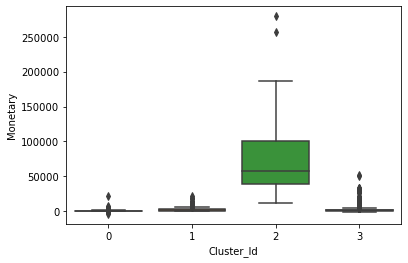

In [71]:
# Box plot to visualize Cluster Id vs Monetary
sns.boxplot(x='Cluster_Id', y='Monetary', data=df_rfm);

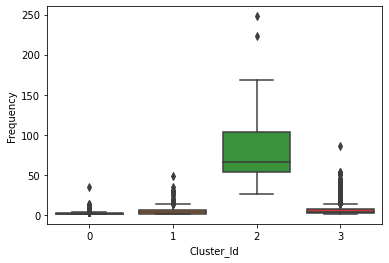

In [72]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_rfm);

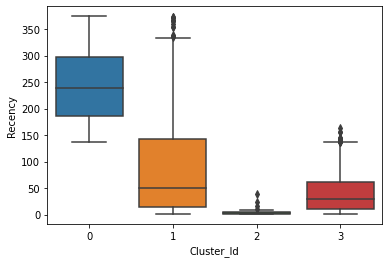

In [73]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=df_rfm);

Inference:¶
As we can observe from above boxplots that our model has nicely created 3 segements of customer with the interpretation as below:

# Customers with Cluster Id 0 are less frequent buyers with low monetary expenditure and also they have not purchased anything in recent time and hence least important for business.

# Customers with Cluster Id 1 are the customers having Recency, Frequency and Monetary score in the medium range.

# Customers with Cluster Id 2 and 3 are the most frequent buyers, spending high amount and recently placing orders so they are the most important customers from business point of view.

In [74]:
from sklearn.cluster import DBSCAN

In [91]:
db = DBSCAN(eps=0.6,min_samples=10)

In [92]:
dbscan_opt=db.fit(X)

In [93]:
X['DBSCAN_opt_labels']=dbscan_opt.labels_

<ipython-input-93-421e17873988>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DBSCAN_opt_labels']=dbscan_opt.labels_


In [94]:
X['DBSCAN_opt_labels'].value_counts()

 0    3998
 1     248
-1     110
 2      16
Name: DBSCAN_opt_labels, dtype: int64

In [95]:
X.head()

,Recency,Frequency,Monetary,Country,DBSCAN_opt_labels
0,2.322023,-0.329362,-0.230417,0.292356,0
1,-0.893733,0.206102,0.294087,-2.800537,1
2,-0.169196,-0.115176,-0.011703,-3.451672,1
3,-0.725005,-0.436455,-0.016533,-2.474969,1
4,2.163220,-0.436455,-0.189723,-1.498267,-1


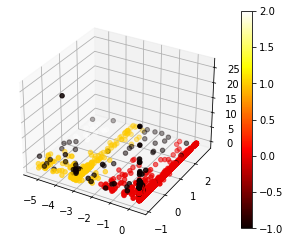

In [96]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X['Country']
y = X['Recency']
z = X['Frequency']
c = X['Monetary']

img = ax.scatter(x, y, z, c=X['DBSCAN_opt_labels'], cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [97]:
X.head()

,Recency,Frequency,Monetary,Country,DBSCAN_opt_labels
0,2.322023,-0.329362,-0.230417,0.292356,0
1,-0.893733,0.206102,0.294087,-2.800537,1
2,-0.169196,-0.115176,-0.011703,-3.451672,1
3,-0.725005,-0.436455,-0.016533,-2.474969,1
4,2.163220,-0.436455,-0.189723,-1.498267,-1


In [98]:
New = pd.DataFrame(sc.inverse_transform(X.drop(['DBSCAN_opt_labels'],axis=1)),columns=['Recency','Frequency','Monetary','Country'])

In [99]:
New['DBSCAN_opt_labels']=dbscan_opt.labels_
New
New = New[New.DBSCAN_opt_labels != -1]#removing outliars

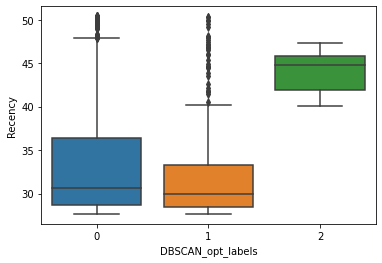

In [100]:
sns.boxplot(x='DBSCAN_opt_labels', y='Recency', data=New);

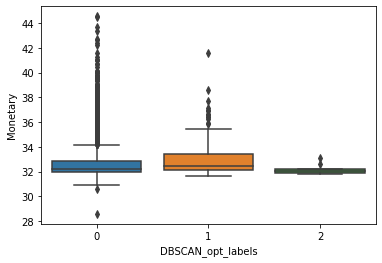

In [101]:
sns.boxplot(x='DBSCAN_opt_labels', y='Monetary', data=New);

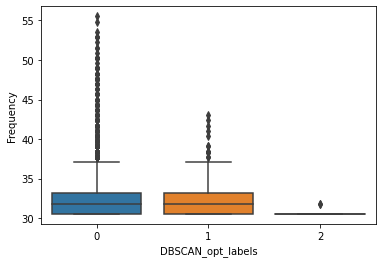

In [102]:
sns.boxplot(x='DBSCAN_opt_labels', y='Frequency', data=New);